<a href="https://colab.research.google.com/github/shdkjsijjkhjakjfeiefj/Deep_Learning_Techniques_Lab/blob/main/Lab_5_RA047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with Sigmoid activation...
Training with Tanh activation...
Training with ReLU activation...
Training with Leaky ReLU activation...


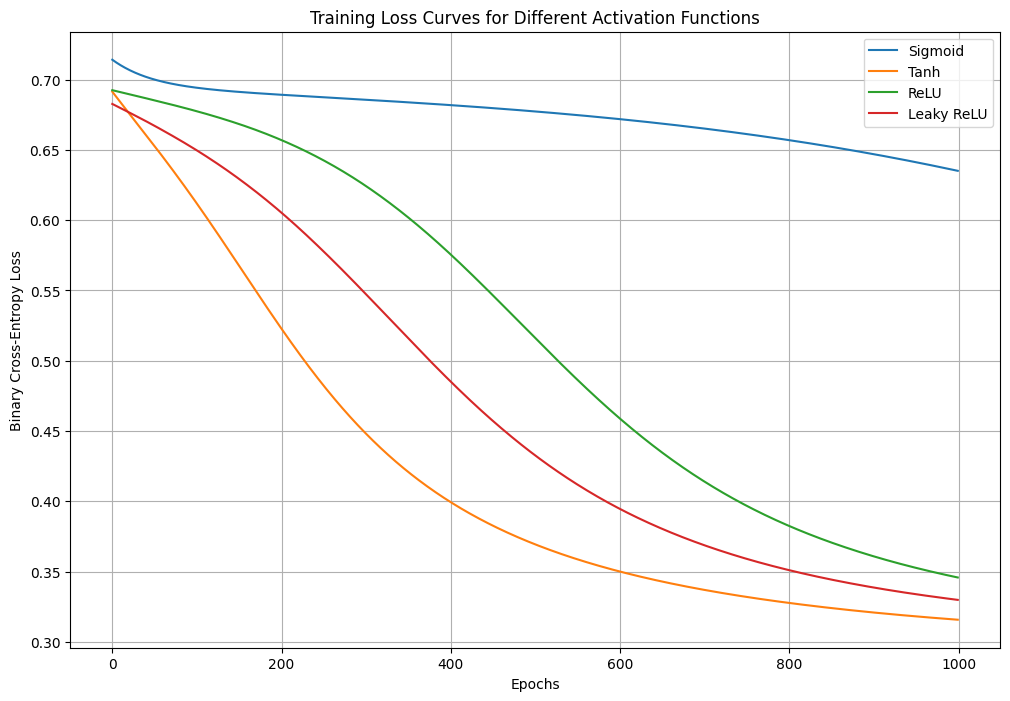

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Activation functions and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx




# Simple 1-hidden-layer Neural Network class
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, activation, activation_deriv):
        self.activation = activation
        self.activation_deriv = activation_deriv

        # Initialize weights with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        # Output layer - sigmoid for binary classification
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output, lr=0.01):
        m = y.shape[0]

        # Compute output error
        delta2 = (output - y) * (output * (1 - output))  # derivative of sigmoid output layer

        # Compute error for hidden layer
        delta1 = delta2.dot(self.W2.T) * self.activation_deriv(self.z1)

        # Update weights and biases
        self.W2 -= lr * self.a1.T.dot(delta2) / m
        self.b2 -= lr * np.sum(delta2, axis=0, keepdims=True) / m
        self.W1 -= lr * X.T.dot(delta1) / m
        self.b1 -= lr * np.sum(delta1, axis=0, keepdims=True) / m

    def train(self, X, y, epochs=1000, lr=0.01):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean(-(y * np.log(output + 1e-9) + (1 - y) * np.log(1 - output + 1e-9)))
            losses.append(loss)
            self.backward(X, y, output, lr)
        return losses


# Generate a toy dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of activation functions and derivatives to test
activations = {
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'Tanh': (tanh, tanh_derivative),
    'ReLU': (relu, relu_derivative),
    'Leaky ReLU': (leaky_relu, leaky_relu_derivative)
}

# Train networks with different activations and store losses
losses_dict = {}

for name, (act, act_deriv) in activations.items():
    print(f"Training with {name} activation...")
    nn = SimpleNN(input_size=2, hidden_size=10, output_size=1, activation=act, activation_deriv=act_deriv)
    losses = nn.train(X_train, y_train, epochs=1000, lr=0.05)
    losses_dict[name] = losses

# Plot the loss curves for comparison
plt.figure(figsize=(12, 8))
for name, losses in losses_dict.items():
    plt.plot(losses, label=name)
plt.title("Training Loss Curves for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.legend()
plt.grid(True)
plt.show()